In [28]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from config import j, dim
latent_dim = dim()

In [29]:
path = j(f'results/{latent_dim}/performance.csv')
df = pd.read_csv(path)
highlight_range0 = df['timestep'][0]
highlight_range = df['timestep'][int(922 * 0.8)]
df

,timestep,latent-rmse_1,rmse_1,latent-mae_1,mae_1,latent%_1,%_1,time_1,latent-rmse_2,rmse_2,...,latent%_8,%_8,time_8,latent-rmse_9,rmse_9,latent-mae_9,mae_9,latent%_9,%_9,time_9
0,5695000,0.001188,0.137115,0.001503,0.106547,0.200751,237270.324093,7906.004906,0.001761,0.137137,...,0.113625,236847.140053,62.290430,0.001601,0.136964,0.001505,0.106396,0.270973,236943.516278,58.641672
1,5700000,0.001050,0.137132,0.000570,0.106557,0.172737,237388.666386,54.456234,0.000774,0.137083,...,0.146498,236928.510877,60.714006,0.001819,0.137012,0.000973,0.106490,0.308036,237534.255227,55.974722
2,5705000,0.000735,0.137083,0.000708,0.106527,0.110421,237086.201102,56.287289,0.000728,0.137149,...,0.274614,237530.638031,57.802677,0.001130,0.136989,0.000549,0.106443,0.181217,237187.698620,84.031343
3,5710000,0.000490,0.137150,0.000669,0.106551,0.070346,236962.484319,56.792498,0.000530,0.137167,...,0.193726,237189.187102,52.387238,0.000947,0.137039,0.000601,0.106492,0.145318,237160.485739,58.094740
4,5715000,0.000398,0.137166,0.000645,0.106596,0.059847,236977.185965,57.683468,0.001256,0.137134,...,0.173855,237164.253176,49.602509,0.001084,0.136988,0.000851,0.106415,0.171281,236978.804290,58.583975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,10280000,0.000614,0.137235,0.000466,0.106628,0.090643,237110.644098,51.666498,0.001421,0.137078,...,0.272362,237418.830360,58.153152,0.001133,0.137198,0.000838,0.106596,0.180879,236758.898575,57.261229
918,10285000,0.000881,0.137094,0.000802,0.106502,0.131872,236551.533917,59.383631,0.002076,0.137001,...,0.087684,236779.821793,48.930168,0.000547,0.137239,0.000720,0.106596,0.084396,236769.305383,63.041925
919,10290000,0.001514,0.136995,0.001264,0.106418,0.246114,236909.399506,55.525064,0.002713,0.137121,...,0.095397,236776.112390,57.705164,0.000992,0.137094,0.000706,0.106532,0.155807,236831.151621,57.626009
920,10295000,0.001378,0.137109,0.001309,0.106550,0.225224,237760.120781,60.576677,0.001318,0.137209,...,0.107941,236804.048593,57.294130,0.000723,0.137322,0.000627,0.106698,0.108177,237562.984361,57.294846


In [30]:
ls = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'indigo', 'purple', 'violet']

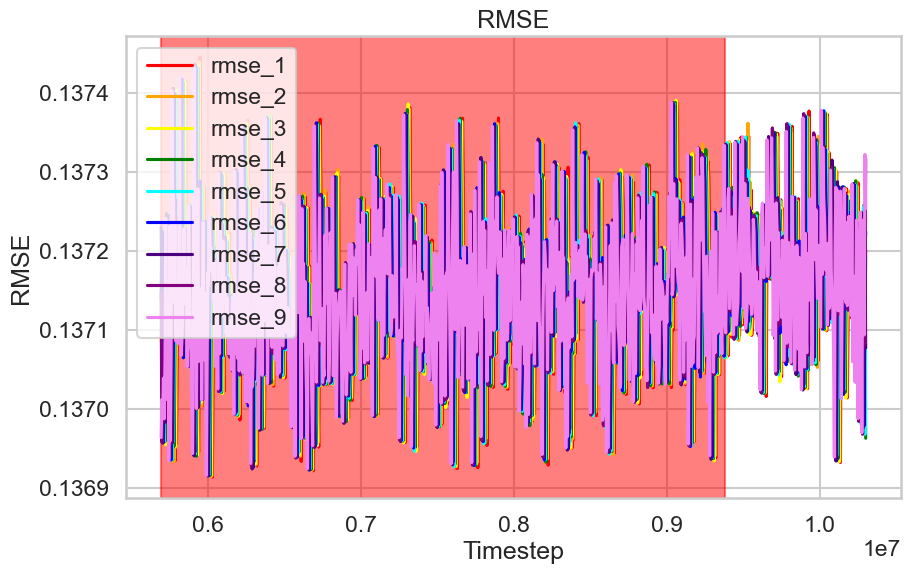

In [31]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'rmse_{i + 1}', label=f'rmse_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)

plt.ylabel('RMSE')
plt.xlabel('Timestep')
# Show the plot
plt.legend()
plt.title('RMSE')
plt.savefig(j(f'results/{latent_dim}/RMSE.pdf'))
plt.show()

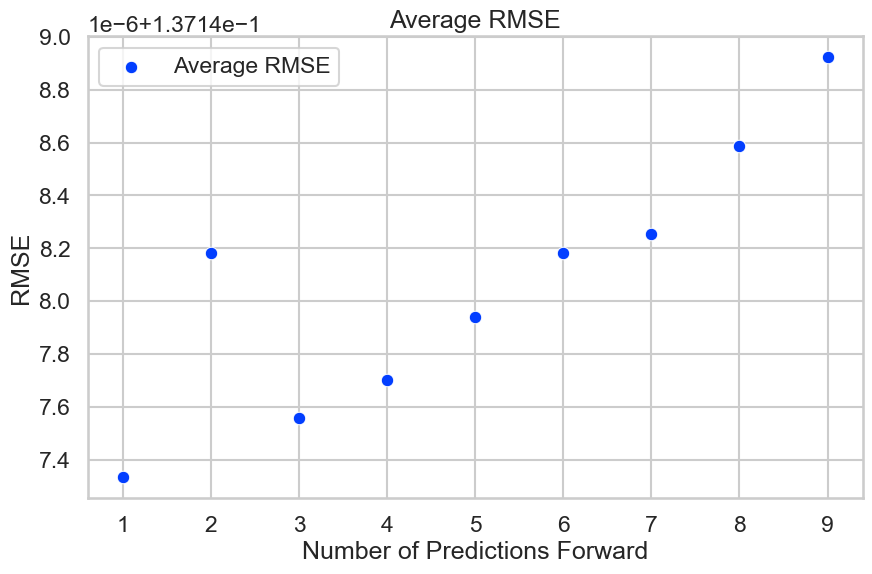

In [32]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('rmse_')])

sns.scatterplot(x=x, y=y, label='Average RMSE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('RMSE')

plt.title('Average RMSE')
plt.savefig(j(f'results/{latent_dim}/average_RMSE.pdf'))
plt.show()

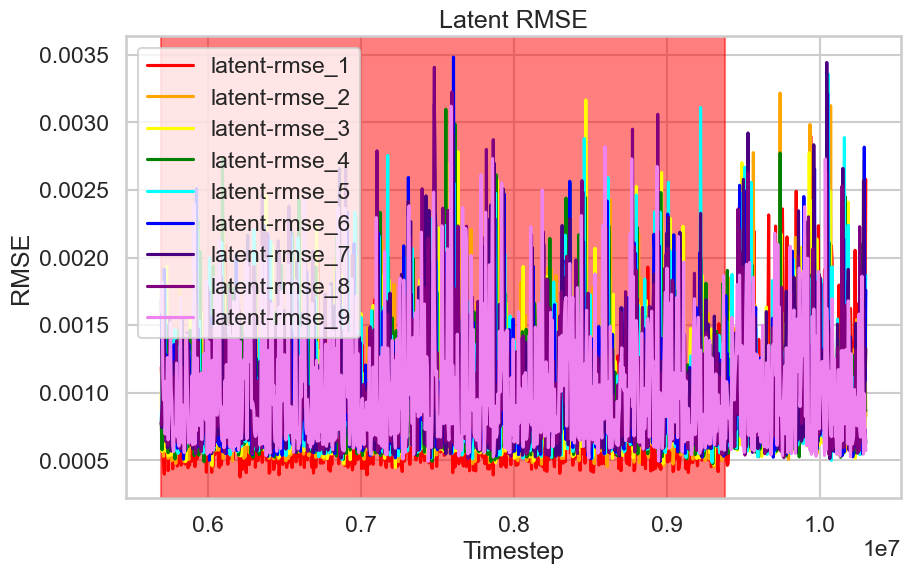

In [33]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'latent-rmse_{i + 1}', label=f'latent-rmse_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)
plt.ylabel('RMSE')
plt.xlabel('Timestep')
# Show the plot
plt.legend()
plt.title('Latent RMSE')
plt.savefig(j(f'results/{latent_dim}/latent_RMSE.pdf'))
plt.show()

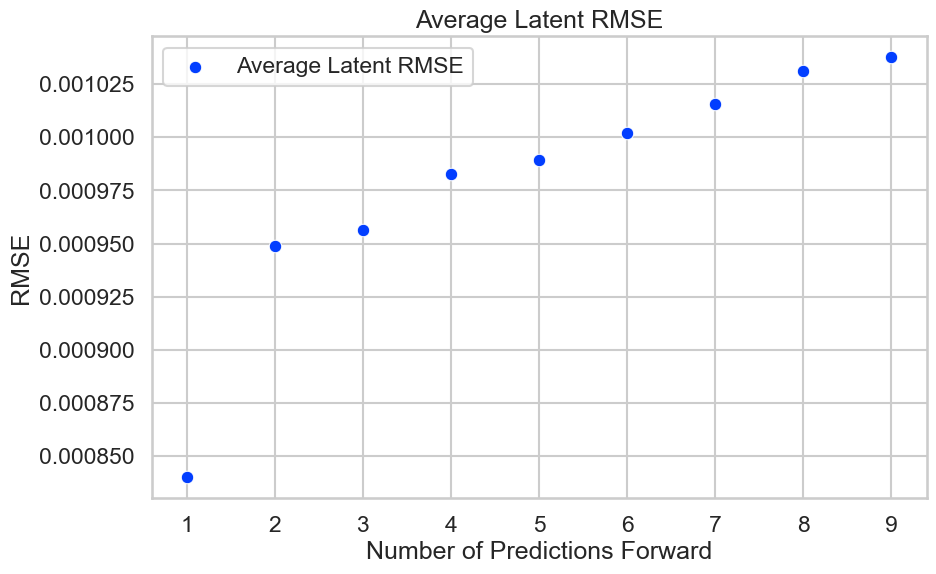

In [34]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('latent-rmse_')])

sns.scatterplot(x=x, y=y, label='Average Latent RMSE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('RMSE')

plt.legend()

plt.title('Average Latent RMSE')
plt.savefig(j(f'results/{latent_dim}/average_latent_RMSE.pdf'))
plt.show()

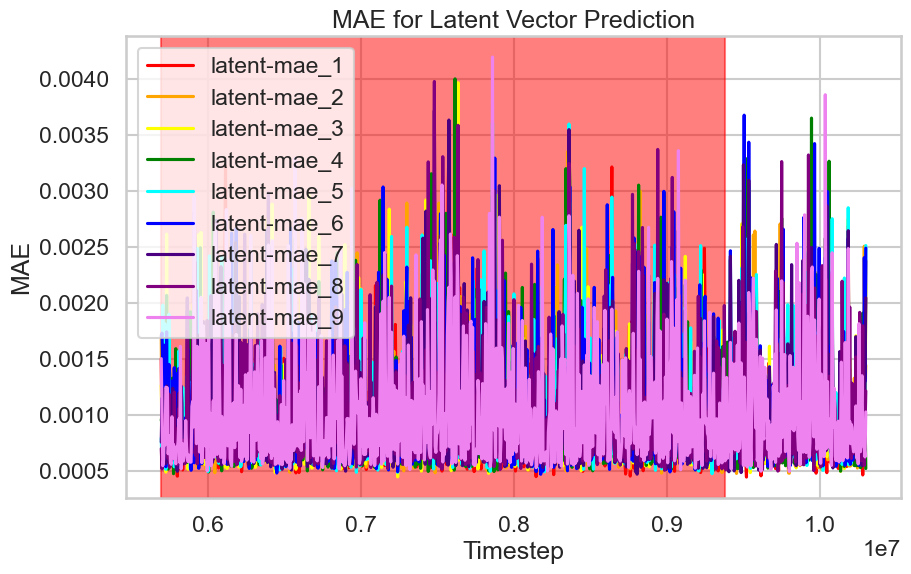

In [35]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'latent-mae_{i + 1}', label=f'latent-mae_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)

plt.ylabel('MAE')
plt.xlabel('Timestep')
# Show the plot
plt.title('MAE for Latent Vector Prediction')
plt.legend()
plt.savefig(j(f'results/{latent_dim}/latent_MAE.pdf'))
plt.show()

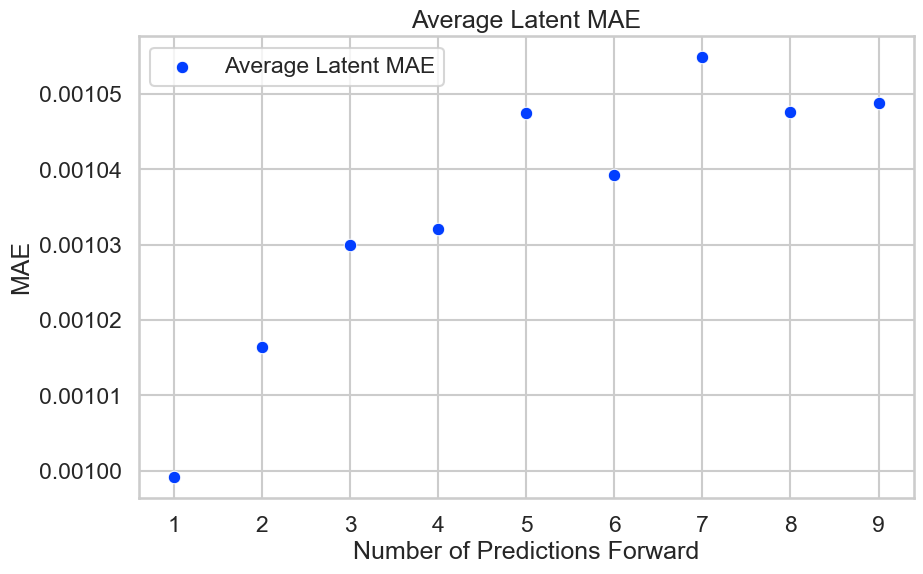

In [36]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('latent-mae_')])

sns.scatterplot(x=x, y=y, label='Average Latent MAE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('MAE')

plt.title('Average Latent MAE')
plt.legend()
plt.savefig(j(f'results/{latent_dim}/average_latent_MAE.pdf'))
plt.show()

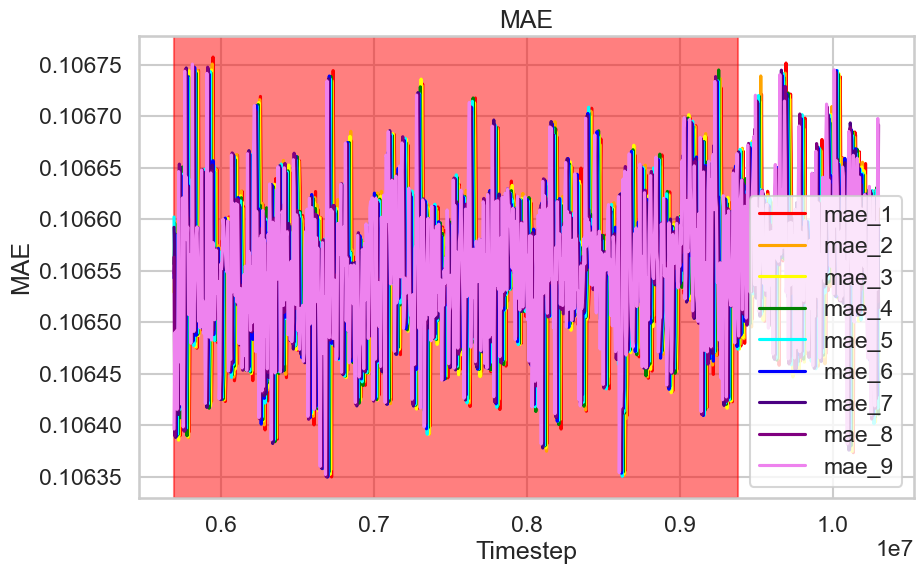

In [37]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each rmse_n
for i in range(len(ls)):
    sns.lineplot(data=df, x='timestep', y=f'mae_{i + 1}', label=f'mae_{i + 1}', color=ls[i])

plt.axvspan(highlight_range0, highlight_range, color='red', alpha=0.5)



plt.ylabel('MAE')
plt.xlabel('Timestep')
# Show the plot
plt.legend()
plt.title('MAE')

plt.savefig(j(f'results/{latent_dim}/MAE.pdf'))
plt.show()

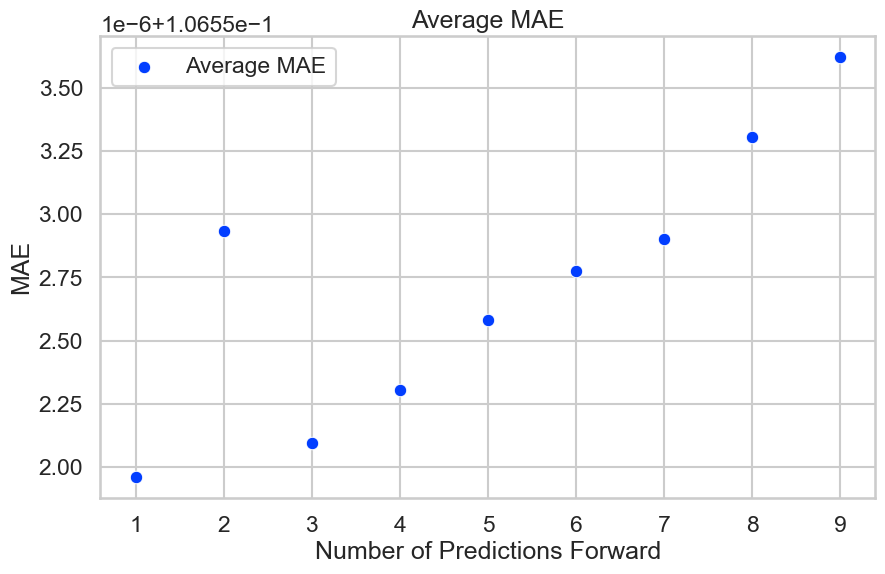

In [38]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([np.mean(np.array(df[i])) for i in df.columns if i.startswith('mae_')])

sns.scatterplot(x=x, y=y, label='Average MAE')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('MAE')

plt.legend()
plt.title('Average MAE')
plt.savefig(j(f'results/{latent_dim}/average_MAE.pdf'))
plt.show()

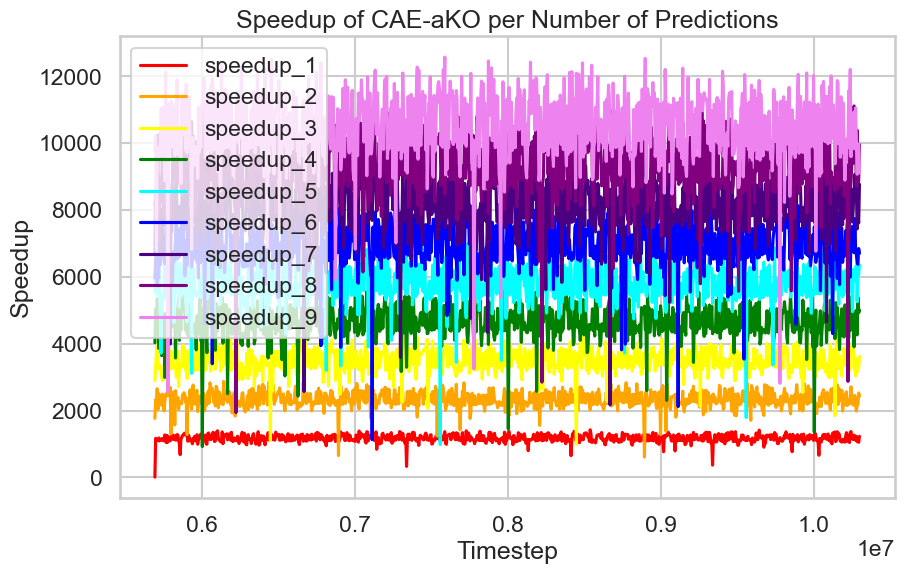

In [39]:
prev_steps_per_ms = 0.0787037037037
prev_time_5000 = 5000 / prev_steps_per_ms


sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("deep")
# Create the plot
plt.figure(figsize=(10, 6))


# Plot each rmse_n
for i in range(len(ls)):
    df[f'time_{i + 1}'] = prev_time_5000 * (i + 1) / df[f'time_{i + 1}']
    sns.lineplot(data=df, x='timestep', y=f'time_{i + 1}', label=f'speedup_{i + 1}', color=ls[i])

plt.ylabel('Speedup')
plt.xlabel('Timestep')
# Show the plot
plt.title('Speedup of CAE-aKO per Number of Predictions')

plt.savefig(j(f'results/{latent_dim}/speedup.pdf'))
plt.show()

df = pd.read_csv(path)

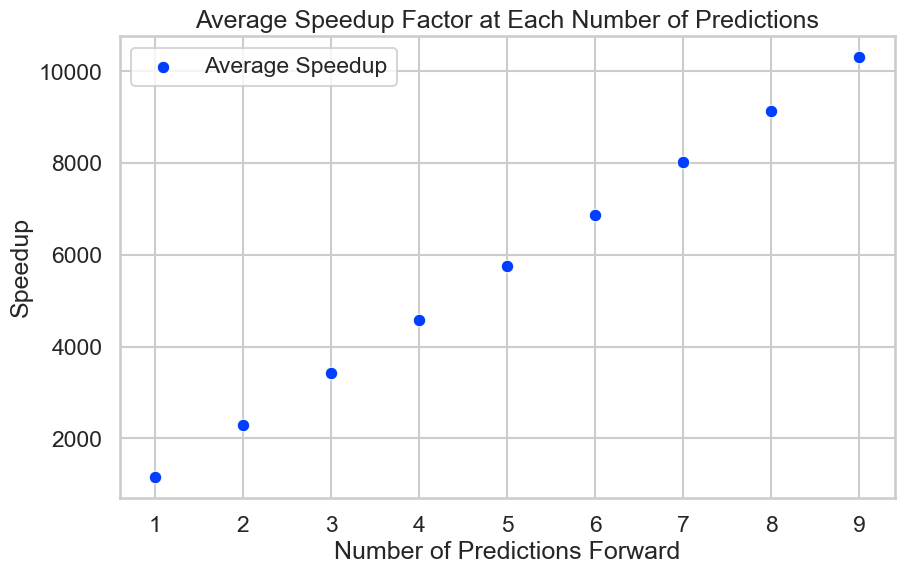

In [40]:
sns.set(style='whitegrid')
sns.set_context("talk")

sns.set_palette("bright")
# Create the plot
plt.figure(figsize=(10, 6))

x = np.arange(9) + 1
y = np.array([prev_time_5000 * i / np.median(np.array(df[f'time_{i}'])) for i in x])

sns.scatterplot(x=x, y=y, label='Average Speedup')

plt.xlabel('Number of Predictions Forward')
plt.ylabel('Speedup')

plt.legend()
plt.title('Average Speedup Factor at Each Number of Predictions')

plt.savefig(j(f'results/{latent_dim}/average_speedup.pdf'))
plt.show()